# Ecommerce Analysis using Linear Regression

#### I will be analyzing an Ecommerce Company's (fictional) dataset to determine whether to focus their efforts on enhancing their mobile app experience or their website.

### Retrieving the Data
#### First, I will import all relative python libraries and obtain our data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
customers = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\Ecommerce Customers.csv')

Let's see what this data looks like.

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Note that the time is given in minutes for all numerical columns except for Length of Membership (years) and Yearly Amount Spent (Dollars)

In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Hypothesis: Time on App and Time on Website are the two factors that drive Yearly Amount Spent
#### To test this hypothesis, let's begin by exploring the data.

## Exploratory Data Analysis(EDA)
I'll start with mapping the Empirical Cumulative Distribution Function (ECDF) for our target variable, Yearly amount spent

In [7]:
#creating a function to do perform Empirical Cumulative Distribution Function (ECDF)
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements.'''
    #Number of data points: n
    n = len(data)
    
    #x-data for the ECDF: x
    x = np.sort(data)
    
    #y-data for the ECDF: y
    y = np.arange(1,n+1)/n
    
    return x,y

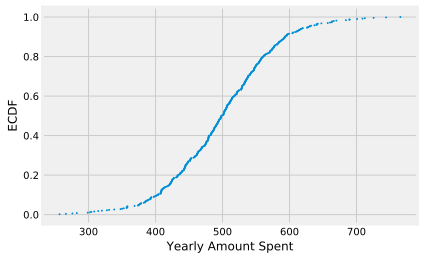

In [8]:
#plotting the ecdf
x, y = ecdf(customers['Yearly Amount Spent'])
_ = plt.plot(x,y, marker = '.',linestyle = 'none',markersize=2)
_ = plt.xlabel('Yearly Amount Spent')
_ = plt.ylabel('ECDF')
plt.show()

The ECDF gives us a sense for the probabilitistic distribution of the data.

Let's start looking at correlations in the data

C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.0026408446721589217

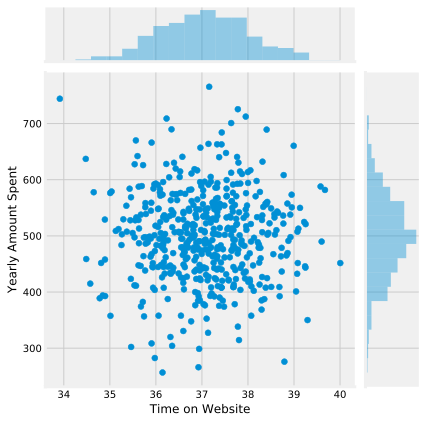

In [9]:
fig = sns.jointplot(customers['Time on Website'],customers['Yearly Amount Spent'])
np.corrcoef(customers['Time on Website'],customers['Yearly Amount Spent'])[0,1]

We see that the correlation is very low, at almost 0, and the plot tells us the same. This is suprising given that one would expect there to be some correlation between time spent on the website and the yearly amount spent. Even without further analysis, we can say that Time on Website is not a driver for Yearly Amount Spent

0.49932777005345047

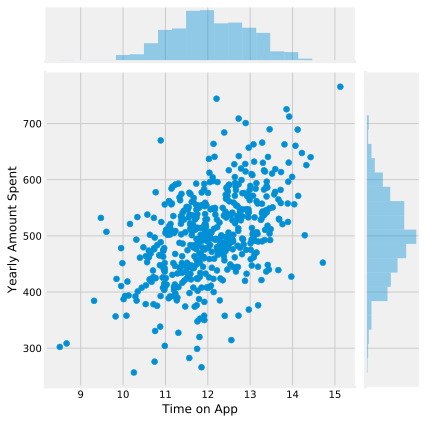

In [10]:
#Let's see if Time on the app matters
fig = sns.jointplot(customers['Time on App'],customers['Yearly Amount Spent'])
np.corrcoef(customers['Time on App'],customers['Yearly Amount Spent'])[0,1]

We see a larger correlation coefficient and the plot shows a more positive coorelation, especially in comparison to the Time on Website plot. Let's view all of our categories in comparison to each other through a pairplot.

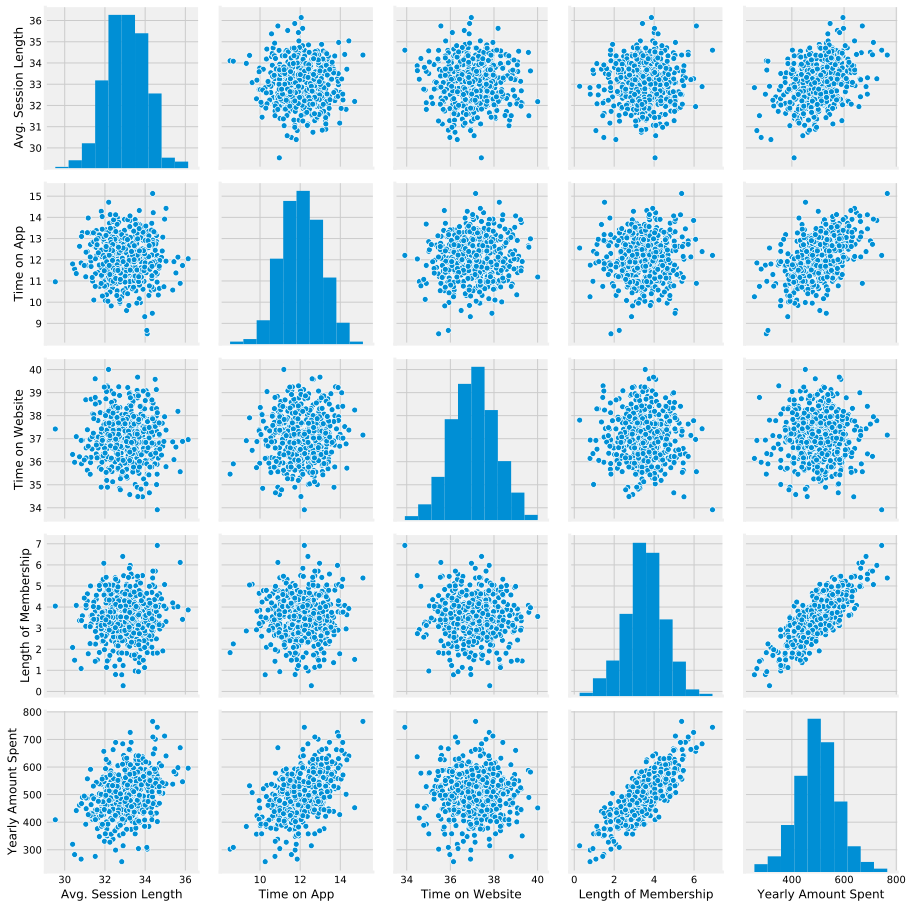

In [11]:
sns.pairplot(customers)

This pairplot shows that Avg. Session Length is slightly correlated and Length of Membership is heavily correlated with Yearly Amount Spent. It's also important to notice that all of our other categories do not appear obviously correlated with one another, making a regression analysis be a good candidate to try to predict Yearly Amount Spent.

Length of membership looks like a linear relationship, so Linear Regression looks to be like a good candidate for this analysis.

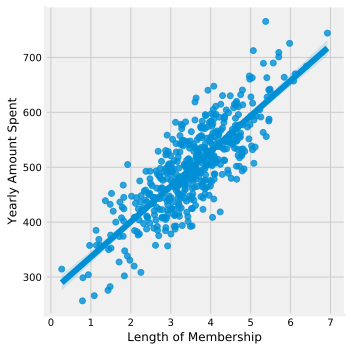

In [12]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent', data = customers)

We can already see that the error bars are very slim (telling us this is a good linear fit) which tells us that the longer you stay a member, the larger your Yearly Amount Spent

## Training and Testing Data
Because we're interested in creating a model that can help us make prediction decisions, we are going to use the sklearn package to split our data into training and testing sets.

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
#we will use all numerical columns for the linear regression input
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [15]:
y = customers['Yearly Amount Spent']

In [16]:
#importing sklearn's train/test split function
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

## Training the Model
Now to train the model with the training data

In [18]:
#importing Linear Regression functionality from sklearn
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#quick check of our coefficients to make sure the numbers look appropriate before evaluating our model
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
We want to evaluate our model before drawing any conclusions from the linear regression fit.

In [22]:
#predicting y values (Yearly Amount Spent) with our model using the data we reserved for testing
predictions = lm.predict(X_test)

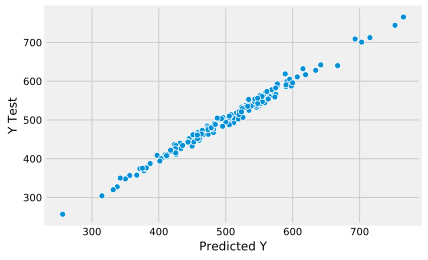

In [23]:
#plotting the real values versus the predicted values
_ = sns.scatterplot(predictions,y_test)
_ = plt.xlabel('Predicted Y')
_ = plt.ylabel('Y Test')

With a perfect diagonal straight line being a perfect prediction, the 1:1 linear-looking relationship means that the model predicts our data well.

## Evaluating the Model
Evaluating the model using common metrics is a good idea before drawing any conclusions. The explained variance score (R^2) is used to determine how much variance your model explains - the closer to 1, the better the model. Other common calculations to measure the performance of a regression model are Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

In [24]:
#pulling metrics functionalities our of sklearn
from sklearn import metrics

In [25]:
print('R^2:', metrics.explained_variance_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.9890771231889607
MAE: 7.228148653430837
MSE: 79.81305165097451
RMSE: 8.933815066978637


Our R^2 value is almost 99% which is very good, as our model describes almost 99% of the variance in the sample. Because the other values relate to the error, we want to see all of these values minimized as much as possible. The MAE is easiest to understand as it is the average error of the model, which is relatively low here.

C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


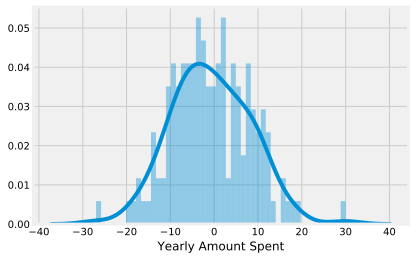

In [26]:
#We want to explore the residuals and we're hoping to see something that is mostly normally distributed. 
sns.distplot((y_test - predictions), bins=50)

With a low average error compared to the magnitude of the values we are working with, and the residuals plot looking normally distributed, this can be considered a good model.

## Drawing Insights
Now I'll return to the coefficients to draw insights about our model and what the company should do

In [27]:
#let's look at the coefficients of the model
cdf = pd.DataFrame(lm.coef_,X.columns,columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


We can see that an increase in the Length of Membership would result in the biggest impact of the value of our customers for Yearly Amount Spent. It's good to remember that Length of Membership is measure in years. Second to Length of Membership is Time on the App.

With the question of what they should focus on between the website and the app, it depends on what the costs of developing the app vs. the website are. It's clear that the website needs more work compared to the time on the app, but it may be more cost effective to continue working on the App instead of bringing the website up to speed. Economic factors would determine which course of action to take, but at least we now have knowledge of the state of our website and our app in terms of yearly spend per customer. Above this, we also found that Length of Membership produced the most impact to a customer's Yearly Amount Spent and should be considered in the evaluation of whether to spend time on developing the app or the website.

## Conclusion
A linear regression analysis was performed for an ecommerce company to help them decide between focusing on their app experience or their website. The model showed that the app currently has greater profitability for one more minute increase compared to the time on the website. An economical analysis would need to be done to further analyze which of the two would be more profitable: bringing the website up or developing the app further in efforts to increase time on either. Alongside this,however, Length of Membership was the greatest impacter in the amount a customer spent yearly, meaning that the longer the customers stay with the company, the more money the company will make in the long run. Length of Membership should be included in the economic consideration of what to focus on.